In [ ]:
## Review Exercise

In [1]:
import math
import numpy as np

def u(c) :
    return np.log(c)

def mu(c):
    return 1/c

In [3]:
from scipy.optimize import minimize

B = (10.0, np.array((11.0, 11.0)))  
S = (10.0, np.array((20.0, 5.0)))  

M0 = np.array((B[0], S[0]))  
M = np.array((B[1], S[1])).T  

w = 10


# w 0 * phi
# c1 = M * phi

p = 0.5

P = np.array((p,1-p))

def U(phi):
    c1 = np.dot(M,phi)
    return -np.dot(P, np.log(c1))

cons =({'type':'eq','fun': lambda phi: np.dot(M0,phi) - w})

opt = minimize(U,(1,1),constraints = cons)

opt

# u = log(c)
# u' = 1/ c
# first order:  s*(1/c1s)

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -2.4183062699268536
           x: [ 6.944e-01  3.056e-01]
         nit: 5
         jac: [-1.000e+00 -1.000e+00]
        nfev: 15
        njev: 5
 multipliers: [-1.000e-01]

In [ ]:
# it measures what is the present value of the item delievered in futrue under certain senario

In [ ]:
## Exercise

In [2]:
import numpy as np
from scipy.optimize import minimize

B=(10, np.array((11,11)))
S = (10, np.array((20,5)))

M0 = np.array((B[0],S[0]))
M = np.array((B[1],S[1])).T

p = 0.5
P = np.array((p, 1-p))

w = 10

def EU(phi):
    c1 = np.dot(M, phi)
    return -np.dot(P, np.log(c1))

cons=({'type':'eq','fun': lambda phi: np.dot(M0,phi) -1})

opt = minimize(EU, (1,1), constraints = cons)

phi_star = opt.x
c1_star = np.dot(M, phi_star)

print("phi* = ",phi_star)
print("c1* =", c1_star)

EU(phi_star)

m = 1/ c1_star

p_star = np.dot(M,np.dot(P, m))


phi* =  [0.06944417 0.03055583]
c1* = [1.37500244 0.91666504]


C:\Users\m502251\AppData\Local\Temp\ipykernel_39320\3613501142.py:17: RuntimeWarning: invalid value encountered in log
  return -np.dot(P, np.log(c1))


np.float64(-0.11572117706287555)

NameError: name 'maybe_save' is not defined

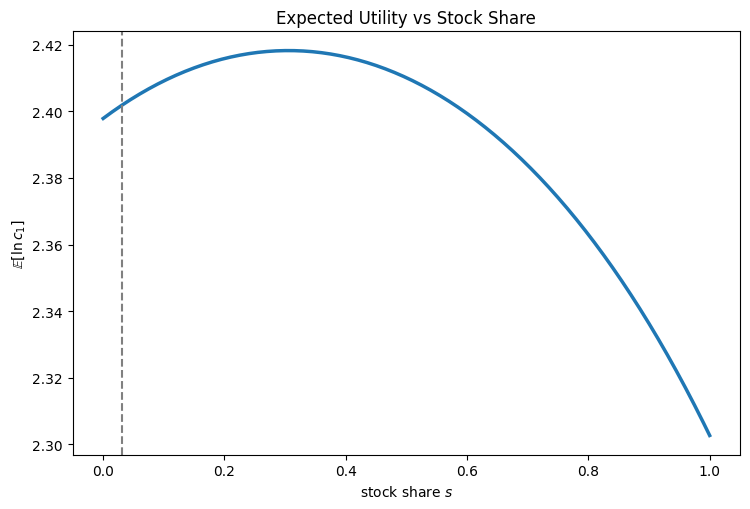

In [6]:
import matplotlib.pyplot as plt
s_grid = np.linspace(0.0, 1.0, 201)  # stock share grid (normalized weights)
b_grid = 1.0 - s_grid  # bond share

phi_grid = np.column_stack((b_grid, s_grid))  # weights (b, s)
c1_grid = phi_grid @ M.T  # state consumption for each portfolio
eu_grid = -np.array([EU(phi) for phi in phi_grid])  # expected utility

fig, ax = plt.subplots(figsize=(7.6, 5.2))
ax.plot(s_grid, eu_grid, lw=2.5)
ax.axvline(phi_star[1], color="gray", ls="--", lw=1.5)
ax.set_xlabel("stock share $s$")
ax.set_ylabel(r"$\mathbb{E}[\ln c_1]$")
ax.set_title("Expected Utility vs Stock Share")
fig.tight_layout()
plt.show()

In [ ]:
## it means when stocks percentage (riskier) first increase, it increase the utility as well, but then the utility decrease as tosck percentage increase.
## As s increases (more stock), state 2 consumption tends to fall

## So the pricing kernel places more weight on the bad state.